#preparing data

In [1]:
#data
import pandas as pd
import numpy as np
import requests
import io
    
# Downloading the csv file from your GitHub account

url = "https://raw.githubusercontent.com/ali-mahani/finding-criticality/master/Phase1/main_data.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')))
df = df.dropna()
# Printing out the first 5 rows of the dataframe

# print (df.head())
X = df.drop(columns= 'criticality')
y = df.criticality


In [2]:
#making train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
len(X_train)

6568

In [3]:
#scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

#model

In [15]:
%%timeit
#multiClassifier SGD
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3, alpha = 0.0001))
clf.fit(X_train, y_train)

10 loops, best of 5: 63.5 ms per loop


In [17]:
%%timeit
clf.predict(X_test)

100 loops, best of 5: 2.07 ms per loop


#confusion matrix

[[513   7  17]
 [ 72   7  83]
 [ 31   3 910]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


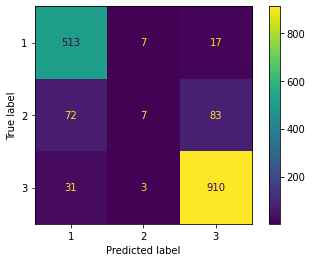

In [5]:
#confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_test, clf.predict(X_test)))
plot_confusion_matrix( clf, X_test, y_test)

In [6]:
#report
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, clf.predict(X_test))
print(clf_report)

              precision    recall  f1-score   support

           1       0.83      0.96      0.89       537
           2       0.41      0.04      0.08       162
           3       0.90      0.96      0.93       944

    accuracy                           0.87      1643
   macro avg       0.72      0.65      0.63      1643
weighted avg       0.83      0.87      0.83      1643



#validation curve

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    1.6s finished


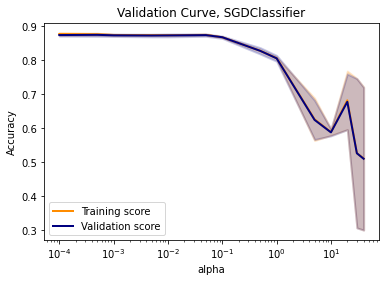

In [21]:
#validation curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
alpha_list = [0,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,20,30,40]

train_scores, valid_scores = validation_curve(SGDClassifier(max_iter=1000, tol=1e-3, alpha = 0.0001),  X_train_scaled, y_train, 
                                              param_name="alpha",
                                              param_range=alpha_list , 
                                              cv=5, 
                                              scoring = 'accuracy',
                                              verbose=1, n_jobs=-1
                                             )

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)


xlabel = 'alpha'
ylabel = 'Accuracy'

plt_title = 'Validation Curve, SGDClassifier'#.format(k)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
plt.semilogx(alpha_list, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(alpha_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(alpha_list, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(alpha_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()

#learning curve

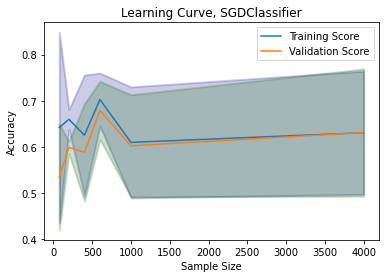

In [27]:
#learning curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
ns_list = np.array([ 3, 5, 10, 20 , 30 , 50, 76, 200,400,600,1000,4000])
ncv = 5

ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator = SGDClassifier(max_iter=1000, tol=1e-3 ), 
                                                   X = X_train_scaled, y = y_train, 
                                                   train_sizes = ns_list, 
                                                   cv = ncv,
                                                   scoring = 'accuracy', 
                                                   n_jobs= -1
                                                   )

train_scores_mean =  train_scores.mean(axis = 1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean =  validation_scores.mean(axis = 1)
validation_scores_std  = validation_scores.std(axis = 1)

xlabel = 'Sample Size'
ylabel = 'Accuracy'

plt_title = 'Learning Curve, SGDClassifier'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, validation_scores_mean, label = 'Validation Score')

plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(ns_list, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.show()

#metric

              precision    recall  f1-score   support

           1       0.84      0.96      0.89       537
           2       0.17      0.01      0.01       162
           3       0.90      0.97      0.93       944

    accuracy                           0.87      1643
   macro avg       0.63      0.64      0.61      1643
weighted avg       0.80      0.87      0.83      1643



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


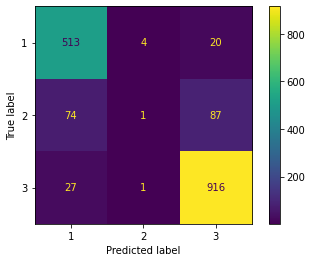

In [9]:
#multiClassifier SGD
#metric = l2
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

clf = make_pipeline(StandardScaler(), SGDClassifier(penalty='l2',max_iter=1000, tol=1e-3, alpha = 0.0001))
clf.fit(X_train, y_train)
clf_report = classification_report(y_test, clf.predict(X_test))
print(clf_report)
plot_confusion_matrix( clf, X_test, y_test)

              precision    recall  f1-score   support

           1       0.82      0.95      0.88       537
           2       0.39      0.04      0.08       162
           3       0.91      0.96      0.93       944

    accuracy                           0.87      1643
   macro avg       0.70      0.65      0.63      1643
weighted avg       0.83      0.87      0.83      1643



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


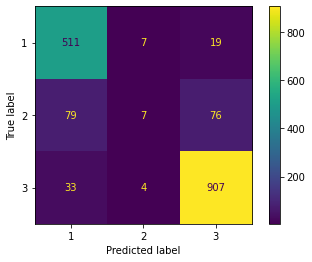

In [10]:
#multiClassifier SGD
#metric = l1
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

clf = make_pipeline(StandardScaler(), SGDClassifier(penalty='l1',max_iter=1000, tol=1e-3, alpha = 0.0001))
clf.fit(X_train, y_train)
clf_report = classification_report(y_test, clf.predict(X_test))
print(clf_report)
plot_confusion_matrix( clf, X_test, y_test)